# Data Preprocessing

In this notebook, I will be doing a train test split in our training data to prevent overfitting. Since all the X features are numerical, Robust Scaler is used to scale the data. There is imbalanced class in this dataset as well, I will try out different resampling methods for modelling.

In [1]:
# Base
import pandas as pd
import numpy as np

# Processing
from sklearn.preprocessing import RobustScaler

# Imbalance
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# Feature Selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
training = pd.read_pickle('datasets/eda_training.pickle')
test = pd.read_pickle('datasets/eda_test.pickle')
data_dict = pd.read_pickle('datadict/data_dict.pickle')

In [3]:
data_dict

,Variable Name,Description,Type,New Column Names
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N,dlq
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage,util_ratio
2,age,Age of borrower in years,integer,age
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer,ph_30to59
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage,debtratio
5,MonthlyIncome,Monthly income,real,monthlyincome
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer,open_credit_loans
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer,ph_90
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer,realestate_lines
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer,ph_60to89


In [4]:
X = training.drop('dlq',axis=1)
y = training['dlq']

# Train Test Split

Train Test Split is essential to prevent overfitting of our data. I will set aside 30% of our training data as our test set. Even though we have a large number of dataset, imbalanced class is present. Hence, we would use the cross validation method on the other 70% of the dataset for training.

<img src = 'http://www.ds100.org/sp17/assets/notebooks/linear_regression/train_test_split.png'><br>
Source: http://www.ds100.org/sp17/assets/notebooks/linear_regression/train_test_split.png

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2,stratify=y)

# Data Scaling

Based on our EDA, there are outliers present in our data set. Hence, I have chosen to use Robust Scaler to scale the data. Robust scaler centers and scale the data based on percentiles thus it would not be largely affected by extreme outliers, yet at the same time still preserves data distribution.

In [6]:
scaler = RobustScaler()
scaler.fit(X_train) # fit training data

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_test = scaler.transform(test)  # scale our test set as well 

# Imbalanced Class Resampling

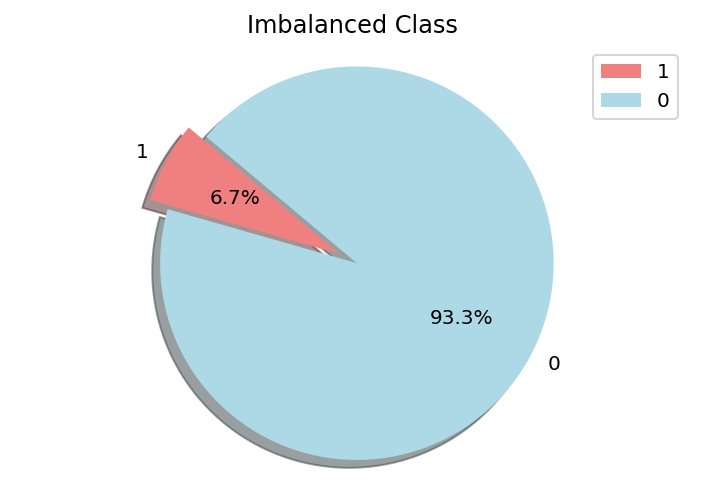

In [7]:
import matplotlib.pyplot as plt
 
# Data
labels = '1','0'
sizes = [y_train[y_train == 1].count(),y_train[y_train == 0].count()]
colors = ['lightcoral','lightblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.legend()
plt.title('Imbalanced Class')

plt.show()

We clearly have an imbalanced dataset as the number of positive class is only 6.7% (Positive (1) class being the person experienced 90 days past due delinquency)

In [8]:
# Dealing with imbalance with SMOTEEN resampling
smoteenn = SMOTEENN(random_state=2)
res_X, res_y = smoteenn.fit_sample(scaled_X_train, y_train)

res_y.sum()/ len(res_y)  # Percentage of samples in the minority class 

0.54821689159038556

In [9]:
res_X.dump('datasets/SMOTE_res_x.pickle')
res_y.dump('datasets/SMOTE_res_y.pickle')
X_test.to_pickle('datasets/scaled_X_test.pickle')
y_test.to_pickle('datasets/y_test.pickle')
scaled_test.dump('datasets/scaled_test.pickle')